In [1]:
#Abhängigkeiten
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
#Daten laden
#strip_1 enthält keine near Einträge mit 1.0?
strip = pd.read_csv('data/train/strip_2_train.csv', sep=',')

In [3]:
#Ersten paar Einträge des Datensatzes ausgeben
strip.head()

,frame_number,strip_id,node_id,timestamp,run_number,ax,ay,az,gx,gy,gz,mx,my,mz,r,near,vicon_x,vicon_y
0,0,2,1,2020-08-05 14:01:18.979,0,0.002070,0.000412,-0.002347,-0.068564,0.041196,0.048849,-0.278804,-0.128186,1.461713,-88.0,1.0,-9.986354,4.972623
1,0,2,2,2020-08-05 14:01:18.936,0,-0.002325,0.000443,0.003013,-0.000075,0.128002,0.125439,0.837867,0.460412,-0.301495,-79.0,1.0,-9.986354,4.972623
2,0,2,3,2020-08-05 14:01:19.042,0,-0.004523,0.002487,0.004086,-0.173151,-0.018156,-0.024630,-6.094392,-3.718103,-1.399821,-65.0,1.0,-9.986354,4.972623
3,0,2,4,2020-08-05 14:01:19.003,0,-0.001163,0.004049,0.005012,-0.093426,0.068027,0.001385,3.227061,-1.346923,-1.629055,-49.0,1.0,-9.986354,4.972623
4,0,2,5,2020-08-05 14:01:19.046,0,-0.002822,0.002234,0.005050,-0.083727,0.085938,-0.028948,1.302266,0.977920,-0.299323,-74.0,1.0,-9.986354,4.972623


In [4]:
strip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350940 entries, 0 to 350939
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   frame_number  350940 non-null  int64  
 1   strip_id      350940 non-null  int64  
 2   node_id       350940 non-null  int64  
 3   timestamp     350940 non-null  object 
 4   run_number    350940 non-null  int64  
 5   ax            350940 non-null  float64
 6   ay            350940 non-null  float64
 7   az            350940 non-null  float64
 8   gx            350940 non-null  float64
 9   gy            350940 non-null  float64
 10  gz            350940 non-null  float64
 11  mx            350940 non-null  float64
 12  my            350940 non-null  float64
 13  mz            350940 non-null  float64
 14  r             182460 non-null  float64
 15  near          350940 non-null  float64
 16  vicon_x       350940 non-null  float64
 17  vicon_y       350940 non-null  float64
dtypes: f

In [5]:
strip['near'].value_counts()

0.0    333150
1.0     17790
Name: near, dtype: int64

/home/monoflop/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='near', ylabel='count'>

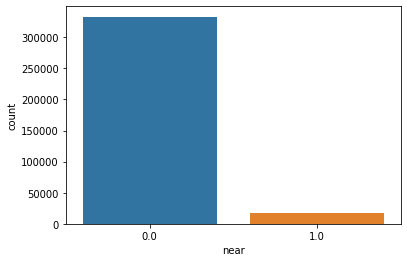

In [6]:
sns.countplot(strip['near'])

In [7]:
#Label aus Datensatz entfernen, damit wir einen Label-Satz und einen Feature-Satz erhalten.
X = strip.drop('near',axis = 1)
Y = strip['near']

#Alle nicht Sensordaten entfernen
X = X.drop('frame_number',axis = 1)
X = X.drop('strip_id',axis = 1)
X = X.drop('node_id',axis = 1)
X = X.drop('timestamp',axis = 1)
X = X.drop('run_number',axis = 1)
X = X.drop('vicon_x',axis = 1)
X = X.drop('vicon_y',axis = 1)

#NaN Werte normalisieren
X = X.fillna(X.mean())

In [8]:
#Training- und Test-Splits erstellen
#75% Trainingsdaten und 25% Testdaten
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [9]:
#Daten einheitlich skalieren von z. B. 0.0 - 1.0
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#Random Forest
forest = RandomForestClassifier(n_estimators=200, random_state = 0)
forest.fit(X_train, Y_train)
forest_prediction = forest.predict(X_test)

In [11]:
#Random Forest Model Report
print(classification_report(Y_test, forest_prediction))
print(confusion_matrix(Y_test, forest_prediction))
print("\nAccuracy = " + str(accuracy_score(Y_test, forest_prediction)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     84084
         1.0       0.75      0.19      0.30      3651

    accuracy                           0.96     87735
   macro avg       0.86      0.59      0.64     87735
weighted avg       0.96      0.96      0.95     87735

[[83851   233]
 [ 2960   691]]

Accuracy = 0.9636063144697099
